<a href="https://colab.research.google.com/github/lialic/datasciencecoursera/blob/master/Projects/CS116/FeatureExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using CNN to extract feature

Name: Huynh Phuong Nhu.\
MSSV: 19520208

## Import libs and mount drive


In [1]:
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Init model

In [3]:
model = VGG16()

553476096/553467096 [==============================] - 5s 0us/step


In [4]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Load data from Drive

In [6]:
%cd '/content/drive/MyDrive/Data/CS116/Data'
!pwd

/content/drive/.shortcut-targets-by-id/11fY6QpzsiYw6V2T_S6CWlNWJBdypvsA-/Data/CS116/Data
/content/drive/.shortcut-targets-by-id/11fY6QpzsiYw6V2T_S6CWlNWJBdypvsA-/Data/CS116/Data


In [55]:
path = './'
datas = {'Cat': [], 'Dog': [], 'Tree': [], 'Human': [], 'Car': []}
all = []
labels = []
images = []

for folder in os.listdir(path):
    for file_name in os.listdir(os.path.join(path, folder)):
        image = cv2.imread(os.path.join(path, folder, file_name))
        image = cv2.resize(image, (224, 224))
        images.append(image)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        image = preprocess_input(image)

        all.append(image)
        labels.append(str(folder))

        new = datas[str(folder)].copy()
        new.append(image)
        datas[str(folder)] = new


In [57]:
features_list = []
for img in all:
    features_list.append(model.predict(img))
train_vgg = [np.array(i[0], dtype=float) for i in features_list]
print(train_vgg)

[array([0.        , 0.        , 0.        , ..., 2.45270967, 0.        ,
       1.90069437]), array([0.        , 0.        , 1.70964909, ..., 1.31155205, 0.        ,
       0.65899062]), array([0.        , 0.        , 1.65881181, ..., 0.56640291, 0.        ,
       0.        ]), array([0.       , 0.       , 0.       , ..., 0.6885041, 0.       ,
       0.       ]), array([0.        , 0.        , 1.00675917, ..., 2.6535759 , 0.        ,
       0.06589699]), array([0.        , 0.        , 1.45090508, ..., 2.91191673, 0.        ,
       0.        ]), array([0.        , 0.17013323, 0.        , ..., 0.        , 0.17726706,
       0.        ]), array([0.8977133 , 0.        , 0.        , ..., 3.72998691, 3.34535384,
       0.        ]), array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.54284185]), array([0.94235706, 0.        , 0.        , ..., 0.        , 0.        ,
       4.56638575]), array([1.31903243, 0.        , 0.        , ..., 0.        , 0.        ,
   

In [60]:
# Load and extract feature from a dog picture
cat_feat = model.predict(datas['Cat'][0])

## Using KNN to group features together

In [59]:
from sklearn.neighbors import NearestNeighbors
clf = NearestNeighbors(n_neighbors=3)
clf.fit(train_vgg, labels)

NearestNeighbors(n_neighbors=3)

In [61]:
from google.colab.patches import cv2_imshow

distance, results = clf.kneighbors(cat_feat, n_neighbors=3)
print(results)

[[ 8 10 15]]


Test Image


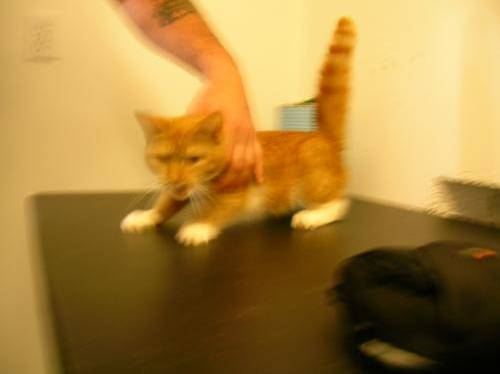

Top 3 Picks


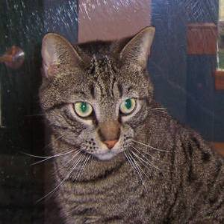

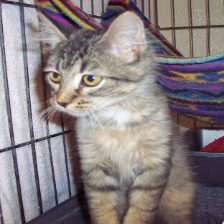

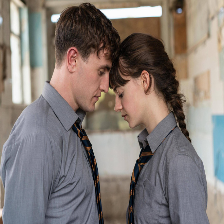

In [62]:
test = cv2.imread('./Cat/1.jpg')
print('Test Image')
cv2_imshow(test)

print('Top 3 Picks')
for i in results[0]:
    cv2_imshow(images[i])